In [2]:
from segment_anything import sam_model_registry, SamPredictor
import cv2
import matplotlib.pyplot as plt
import numpy as np
import torch

In [3]:
def show_mask(mask, ax, random_color=False):
    if random_color:
        color = np.concatenate([np.random.random(3), np.array([0.6])], axis=0)
    else:
        color = np.array([30/255, 144/255, 255/255, 0.6])
    h, w = mask.shape[-2:]
    mask_image = mask.reshape(h, w, 1) * color.reshape(1, 1, -1)
    ax.imshow(mask_image)
    
def show_points(coords, labels, ax, marker_size=375):
    pos_points = coords[labels==1]
    neg_points = coords[labels==0]
    ax.scatter(pos_points[:, 0], pos_points[:, 1], color='green', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)
    ax.scatter(neg_points[:, 0], neg_points[:, 1], color='red', marker='*', s=marker_size, edgecolor='white', linewidth=1.25)   
    
def show_box(box, ax):
    x0, y0 = box[0], box[1]
    w, h = box[2] - box[0], box[3] - box[1]
    ax.add_patch(plt.Rectangle((x0, y0), w, h, edgecolor='green', facecolor=(0,0,0,0), lw=2)) 

In [4]:
sam_checkpoint = "Model/sam_vit_h_4b8939.pth"
model_type = "vit_h"

device = "mps"

sam = sam_model_registry[model_type](checkpoint=sam_checkpoint)
sam.to(device=device)

predictor = SamPredictor(sam)

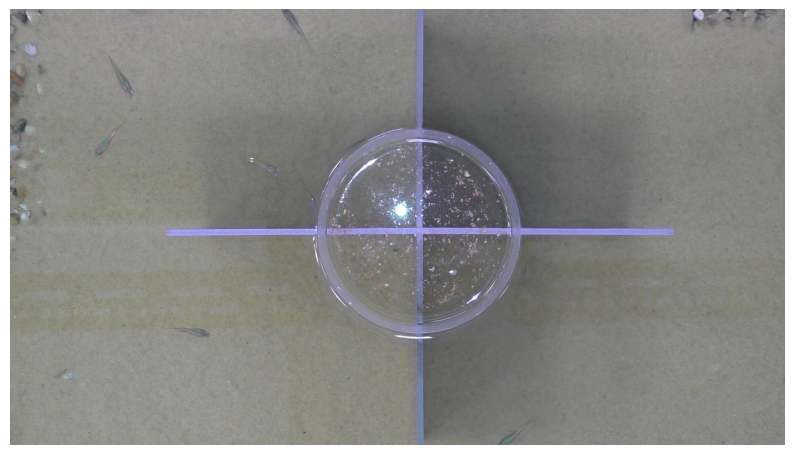

In [6]:
image = cv2.imread("Frames/frame100.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

plt.figure(figsize=[10,10])
plt.imshow(image)
plt.axis("off")
plt.show()

In [7]:
predictor.set_image(image)

In [9]:
input_point = np.array([[280, 200]])
input_label = np.array([1])

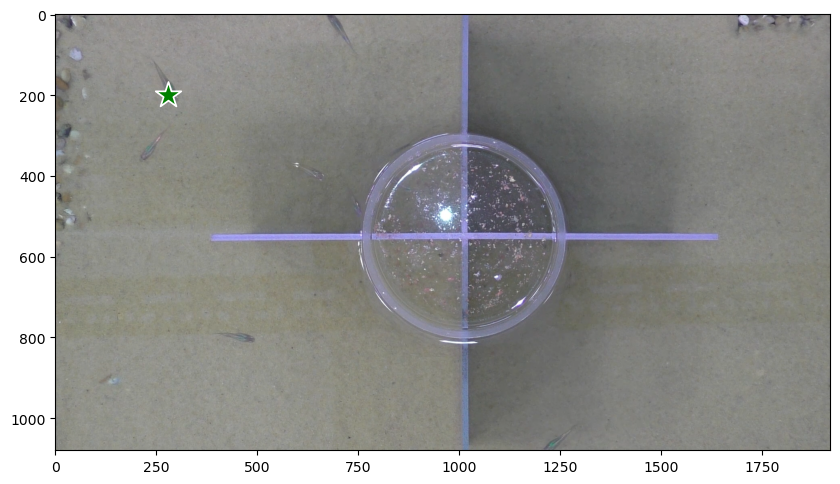

In [10]:
plt.figure(figsize=(10,10))
plt.imshow(image)
show_points(input_point, input_label, plt.gca())
plt.axis('on')
plt.show()

In [11]:
fish_points = np.array([[280, 200], [250, 280]])
background_points = np.array([[200, 625], [1500, 625], [200, 50], [1500, 400]])

input_point = np.concatenate([fish_points, background_points], axis=0)
input_label = np.array([1, 1, 0, 0, 0, 0])

mask_input = logits[np.argmax(scores), :, :]  # Choose the model's best mask

NameError: name 'logits' is not defined

In [12]:
masks, _, _ = predictor.predict(
    point_coords=input_point,
    point_labels=input_label,
    mask_input=mask_input[None, :, :],
    multimask_output=False,
)

NameError: name 'mask_input' is not defined

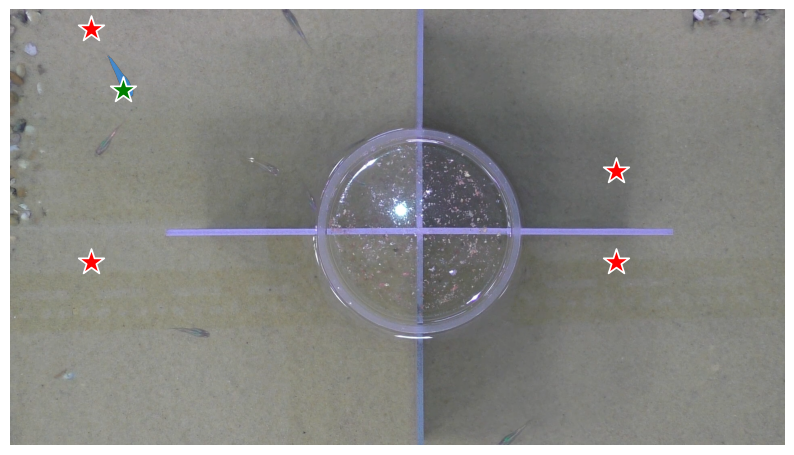

In [ ]:
plt.figure(figsize=(10, 10))
plt.imshow(image)
show_mask(masks, plt.gca())
show_points(input_point, input_label, plt.gca())
plt.axis('off')
plt.show()